In [1]:
from google.colab import files
data = files.upload()

Saving 來臺旅客性別.csv to 來臺旅客性別.csv


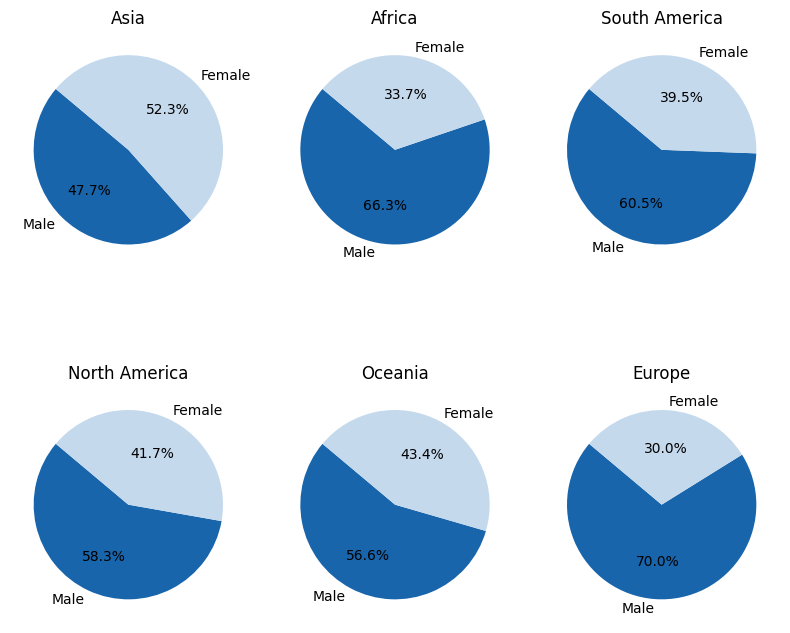

In [2]:
import csv
import matplotlib.pyplot as plt

# 讀取資料 字典式查詢
def read_data_from_csv(filename):
    data = {'Continent': [], 'Male': [], 'Female': [], 'Total': []}
    with open(filename, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data['Continent'].append(row['Continent'])
            data['Male'].append(int(row['Male'].replace(',', '')))
            data['Female'].append(int(row['Female'].replace(',', '')))
            data['Total'].append(int(row['Total'].replace(',', '')))
    return data

filename = '來臺旅客性別.csv'
data = read_data_from_csv(filename)

# 繪製堆疊的圓餅圖
fig, axes = plt.subplots(2, 3, figsize=(8, 8)) # 子圖數量2行3列
colors = ['#1865ac', '#c5d9ed']

for i, continent in enumerate(data['Continent']):
    male_data = data['Male'][i]
    female_data = data['Female'][i]
    total = male_data + female_data

    male_percentage = male_data / total * 100
    female_percentage = female_data / total * 100

    row_index = i // 3 # 0在第一行 1在第2行
    col_index = i % 3 # 0在第一列 1在第2列 2在第3列

    axes[row_index, col_index].pie([male_percentage, female_percentage],
    labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140, colors=colors)
    axes[row_index, col_index].set_title(continent)

# 調整子圖布局
plt.tight_layout()

# 顯示整個圖
plt.show()
